**Solution of PDE Using Laplace Equation with Gauss-Seidel Iteration:**

The Laplace equation is a second-order partial differential equation given by:



In [ ]:
∇²u = 0

It describes steady-state phenomena such as heat conduction, electrostatics, and fluid flow.

**Concept:**
- The Gauss-Seidel method is an iterative technique used to solve the Laplace equation numerically.
- It updates the value of each grid point based on the average of its neighboring points until convergence is achieved.

**Steps:**
1. **Discretization:** Divide the domain into a grid and approximate the Laplace equation using finite differences:
   ```
   u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
   ```
2. **Boundary Conditions:** Apply known values at the boundaries (e.g., Dirichlet conditions).
3. **Iteration:** Update interior grid points using the Gauss-Seidel formula until the solution converges (error < tolerance).

**Advantages:**
- Simple and easy to implement.
- Suitable for steady-state problems.

**Applications:**  
Used in heat transfer, fluid dynamics, and electrostatics to solve steady-state PDEs numerically.

Converged after 1792 iterations with error 9.987875817518699e-07


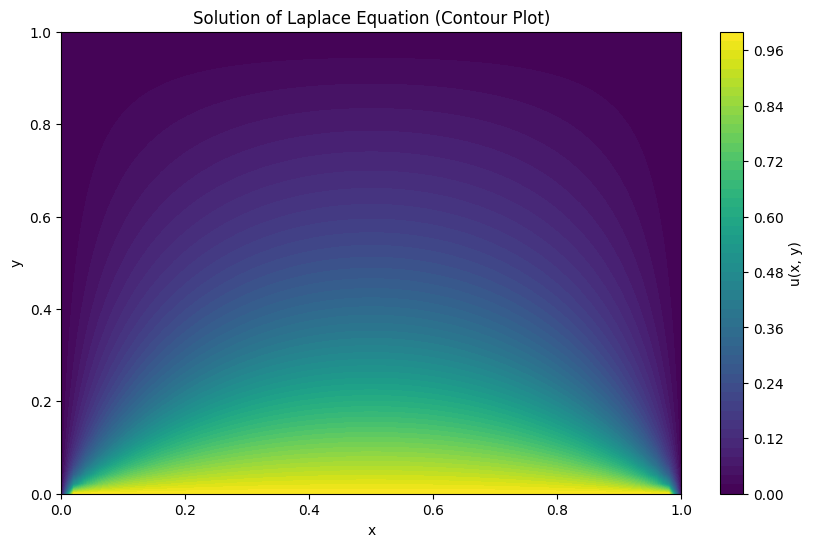

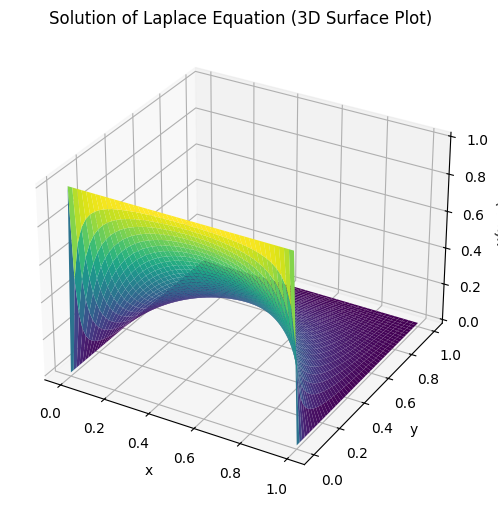

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Laplace solver using Gauss-Seidel iteration
def solve_laplace_gauss_seidel(domain, boundary_conditions, nx, ny, tol):
    """
    Solve the Laplace equation using Gauss-Seidel iteration.

    Parameters:
    domain: tuple (xmin, xmax, ymin, ymax)
    boundary_conditions: dict with "top", "bottom", "left", "right"
    nx, ny: number of grid points
    tol: convergence tolerance

    Returns:
    u: 2D array of solution values
    x, y: grid points
    """
    # Unpack domain
    xmin, xmax, ymin, ymax = domain
    hx = (xmax - xmin) / (nx - 1)
    hy = (ymax - ymin) / (ny - 1)

    # Create grid
    x = np.linspace(xmin, xmax, nx)
    y = np.linspace(ymin, ymax, ny)
    u = np.zeros((ny, nx))

    # Apply boundary conditions
    u[0, :] = boundary_conditions["top"]
    u[-1, :] = boundary_conditions["bottom"]
    u[:, 0] = boundary_conditions["left"]
    u[:, -1] = boundary_conditions["right"]

    # Iterative solution using Gauss-Seidel
    max_iter = 10000
    for iteration in range(max_iter):
        u_old = u.copy()

        # Update interior points
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])

        # Check convergence
        error = np.max(np.abs(u - u_old))
        if error < tol:
            print(f"Converged after {iteration} iterations with error {error}")
            break

    return x, y, u

# Define problem parameters
domain = (0, 1, 0, 1)  # [xmin, xmax, ymin, ymax]
boundary_conditions = {
    "top": 1,     # u(x, y=1) = 1
    "bottom": 0,  # u(x, y=0) = 0
    "left": 0,    # u(x=0, y) = 0
    "right": 0    # u(x=1, y) = 0
}
nx, ny = 50, 50
tol = 1e-6

# Solve the Laplace equation
x, y, u = solve_laplace_gauss_seidel(domain, boundary_conditions, nx, ny, tol)

# Visualization
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, u, levels=50, cmap="viridis")
plt.colorbar(label="u(x, y)")
plt.title("Solution of Laplace Equation (Contour Plot)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap="viridis")
ax.set_title("Solution of Laplace Equation (3D Surface Plot)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x, y)")
plt.show()


**Solution of PDE Using Poisson's Equation with Gauss-Seidel Iteration:**

The Poisson equation is a second-order partial differential equation given by:



In [ ]:
∇²u = f(x, y)

It describes phenomena such as heat conduction with sources, electrostatics, and fluid flow with external forces.

**Concept:**
- The Gauss-Seidel method is an iterative technique used to solve the Poisson equation numerically.
- It updates the value of each grid point based on the average of its neighboring points and the source term until convergence is achieved.

**Steps:**
1. **Discretization:** Divide the domain into a grid and approximate the Poisson equation using finite differences:
   ```
   u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - h² * f[i, j])
   ```
   where `h` is the grid spacing.
2. **Boundary Conditions:** Apply known values at the boundaries (e.g., Dirichlet conditions).
3. **Iteration:** Update interior grid points using the Gauss-Seidel formula until the solution converges (error < tolerance).

**Advantages:**
- Simple and easy to implement.
- Suitable for steady-state problems with source terms.

**Applications:**  
Used in heat transfer, fluid dynamics, and electrostatics to solve steady-state PDEs with external sources numerically.

Converged after 1858 iterations with error 9.998938609312447e-07


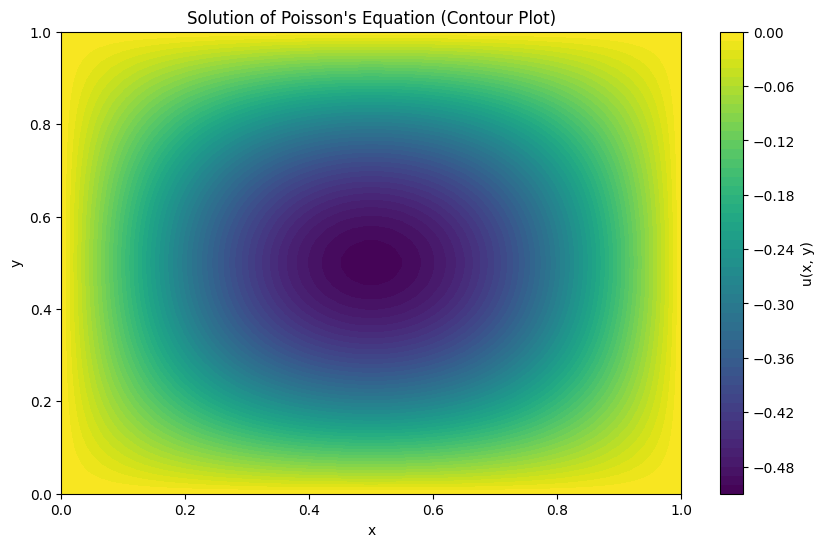

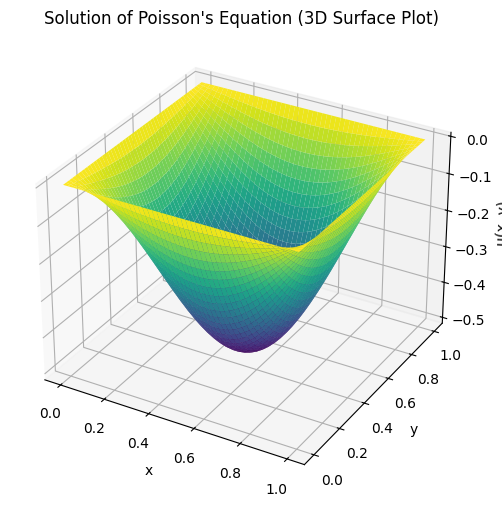

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Poisson solver using Gauss-Seidel iteration
def solve_poisson_gauss_seidel(domain, boundary_conditions, f, nx, ny, tol):
    """
    Solve the Poisson equation using Gauss-Seidel iteration.
    """

    # Unpack domain
    xmin, xmax, ymin, ymax = domain
    hx = (xmax - xmin) / (nx - 1)
    hy = (ymax - ymin) / (ny - 1)
    h = hx  # Assuming uniform grid spacing

    # Create grid
    x = np.linspace(xmin, xmax, nx)
    y = np.linspace(ymin, ymax, ny)
    u = np.zeros((ny, nx))

    # Apply boundary conditions
    u[0, :] = boundary_conditions["top"]
    u[-1, :] = boundary_conditions["bottom"]
    u[:, 0] = boundary_conditions["left"]
    u[:, -1] = boundary_conditions["right"]

    # Compute source term on the grid
    F = np.zeros((ny, nx))
    for i in range(ny):
        for j in range(nx):
            F[i, j] = f(x[j], y[i])

    # Iterative solution using Gauss-Seidel
    max_iter = 10000
    for iteration in range(max_iter):
        u_old = u.copy()

        # Update interior points
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - h**2 * F[i, j])

        # Check convergence
        error = np.max(np.abs(u - u_old))
        if error < tol:
            print(f"Converged after {iteration} iterations with error {error}")
            break

    return x, y, u

# Define problem parameters
domain = (0, 1, 0, 1)  # [xmin, xmax, ymin, ymax]
boundary_conditions = {
    "top": 0,     # u(x, y=1) = 0
    "bottom": 0,  # u(x, y=0) = 0
    "left": 0,    # u(x=0, y) = 0
    "right": 0    # u(x=1, y) = 0
}
nx, ny = 50, 50
tol = 1e-6

# Define source term f(x, y)
def source_term(x, y):
    return 10 * np.sin(np.pi * x) * np.sin(np.pi * y)

# Solve the Poisson equation
x, y, u = solve_poisson_gauss_seidel(domain, boundary_conditions, source_term, nx, ny, tol)

# Visualization
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, u, levels=50, cmap="viridis")
plt.colorbar(label="u(x, y)")
plt.title("Solution of Poisson's Equation (Contour Plot)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap="viridis")
ax.set_title("Solution of Poisson's Equation (3D Surface Plot)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u(x, y)")
plt.show()
